## Estandarización / Reducción de Dimensiones

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
pd.options.display.float_format = '{:,.6f}'.format

### Lectura de datos

In [5]:
data_iris = datasets.load_iris()
data_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Descripcion del dataset:
* Conjunto de datos consta de 3 tipos diferentes de Iris (Setosa, Versicolo, virginica), con las mediciones de pétalos y sépalos (150 observaciones).
* Las filas son observaciones de las plantas y las columnas son largo y ancho de los pétalos y sépalos.

## Tratamiento y limpieza

In [4]:
df_iris = pd.DataFrame(
    data = np.c_[ data_iris['data'], data_iris['target']],
    columns = data_iris['feature_names'] + ['tipo_iris']
)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo_iris
0,5.100000,3.500000,1.400000,0.200000,0.000000
1,4.900000,3.000000,1.400000,0.200000,0.000000
2,4.700000,3.200000,1.300000,0.200000,0.000000
3,4.600000,3.100000,1.500000,0.200000,0.000000
4,5.000000,3.600000,1.400000,0.200000,0.000000
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300000,2.000000
146,6.300000,2.500000,5.000000,1.900000,2.000000
147,6.500000,3.000000,5.200000,2.000000,2.000000
148,6.200000,3.400000,5.400000,2.300000,2.000000


In [9]:
cols = df_iris.columns.to_list()
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'tipo_iris']

In [11]:
cols = [ x for x in cols if x not in ['tipo_iris']]
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df_iris[cols].describe(percentiles=np.arange(0, 1.01, .1))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
0%,4.300000,2.000000,1.000000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
20%,5.000000,2.700000,1.500000,0.200000
30%,5.270000,2.800000,1.700000,0.400000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000


## Estandarización

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

### __Standardization (Variance Scaling)__

Feature standardization si defined as:

$$ \hat{x} = \frac{x - mean(x)}{sqrt(var(x))}  = \frac{x-\hat{x}}{\bar{\sigma}_x}$$

It substracts off the mean of the feature (over all data points) and divides by the variance. hence, it can alse be called _variance scaling_. The resulting scaled featured has a mean of $0$ and variance of $1$. if the original features has a Gaussian distribution, then the scaled features does too.

Standardization of dataset is common requirement for many machine learning estimators: they migt behave badly if the individual featires do not more or less look like staandard normally distributed data.

__Standarization is much less affected by outliers__

In [15]:
ss = StandardScaler()

In [16]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo_iris
0,5.100000,3.500000,1.400000,0.200000,0.000000
1,4.900000,3.000000,1.400000,0.200000,0.000000
2,4.700000,3.200000,1.300000,0.200000,0.000000
3,4.600000,3.100000,1.500000,0.200000,0.000000
4,5.000000,3.600000,1.400000,0.200000,0.000000
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300000,2.000000
146,6.300000,2.500000,5.000000,1.900000,2.000000
147,6.500000,3.000000,5.200000,2.000000,2.000000
148,6.200000,3.400000,5.400000,2.300000,2.000000


In [18]:
df_iris[['ss_' + c for c in cols]] = ss.fit_transform( df_iris[cols] )
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo_iris,ss_sepal length (cm),ss_sepal width (cm),ss_petal length (cm),ss_petal width (cm)
0,5.100000,3.500000,1.400000,0.200000,0.000000,-0.900681,1.019004,-1.340227,-1.315444
1,4.900000,3.000000,1.400000,0.200000,0.000000,-1.143017,-0.131979,-1.340227,-1.315444
2,4.700000,3.200000,1.300000,0.200000,0.000000,-1.385353,0.328414,-1.397064,-1.315444
3,4.600000,3.100000,1.500000,0.200000,0.000000,-1.506521,0.098217,-1.283389,-1.315444
4,5.000000,3.600000,1.400000,0.200000,0.000000,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.300000,2.000000,1.038005,-0.131979,0.819596,1.448832
146,6.300000,2.500000,5.000000,1.900000,2.000000,0.553333,-1.282963,0.705921,0.922303
147,6.500000,3.000000,5.200000,2.000000,2.000000,0.795669,-0.131979,0.819596,1.053935
148,6.200000,3.400000,5.400000,2.300000,2.000000,0.432165,0.788808,0.933271,1.448832


In [19]:
cols_ss = df_iris.filter( like='ss_').columns.tolist()
cols_ss

['ss_sepal length (cm)',
 'ss_sepal width (cm)',
 'ss_petal length (cm)',
 'ss_petal width (cm)']

In [20]:
df_iris[cols_ss].describe( percentiles=np.arange(0, 1.01, .1) )

,ss_sepal length (cm),ss_sepal width (cm),ss_petal length (cm),ss_petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000
std,1.003350,1.003350,1.003350,1.003350
min,-1.870024,-2.433947,-1.567576,-1.447076
0%,-1.870024,-2.433947,-1.567576,-1.447076
10%,-1.264185,-1.282963,-1.340227,-1.315444
20%,-1.021849,-0.822570,-1.283389,-1.315444
30%,-0.694696,-0.592373,-1.169714,-1.052180
40%,-0.294842,-0.131979,0.080709,-0.051775
50%,-0.052506,-0.131979,0.336478,0.132510


## Reducción de Dimensiones - PCA

In [21]:
cols_ss

['ss_sepal length (cm)',
 'ss_sepal width (cm)',
 'ss_petal length (cm)',
 'ss_petal width (cm)']

Linear dimensionality reduction using Singular Value Descomposition of the data to prject it to a lower dimensional space, The input data is centered but not scaled for each feature applying the SVD. 

### Componentes principales: $n\_components=2$ 

In [22]:
pca = PCA( n_components = 2 )

In [23]:
# Fit the model with X and apply the dimensionality reduction on X.
array_pca = pca.fit_transform( df_iris[cols_ss] )

In [30]:
array_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [31]:
df_pca = pd.DataFrame(
    {
        'PCA1' : array_pca[:,0],
        'PCA2' : array_pca[:,1],
        'tipo_iris' : df_iris['tipo_iris']
    }
)
df_pca

,PCA1,PCA2,tipo_iris
0,-2.264703,0.480027,0.000000
1,-2.080961,-0.674134,0.000000
2,-2.364229,-0.341908,0.000000
3,-2.299384,-0.597395,0.000000
4,-2.389842,0.646835,0.000000
...,...,...,...
145,1.870503,0.386966,2.000000
146,1.564580,-0.896687,2.000000
147,1.521170,0.269069,2.000000
148,1.372788,1.011254,2.000000


In [39]:
# Variance explained by component
evr = pca.explained_variance_ratio_
print(f"Varianza explicada por componente: \n PCA1: {evr[0]} \n PCA2: {evr[1]}")

Varianza explicada por componente: 
 PCA1: 0.7296244541329986 
 PCA2: 0.22850761786701776


In [41]:
# variance total explained
s_evr = pca.explained_variance_ratio_.sum()
print(f"Varianza explicada total: {s_evr}")

Varianza explicada total: 0.9581320720000164


In [42]:
# Variance explained by variable by component
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

#### Graficas simples

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

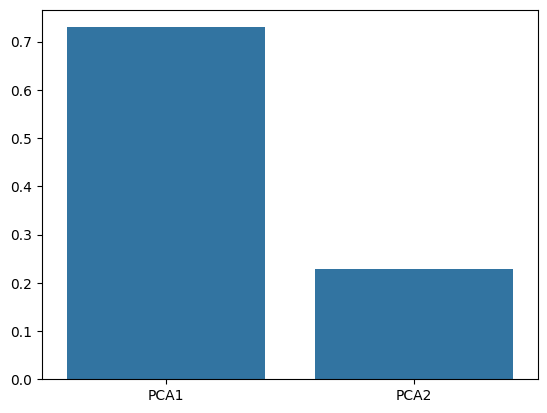

In [45]:
sns.barplot(
    x = ['PCA1', 'PCA2'],
    y = pca.explained_variance_ratio_
)

<Axes: xlabel='PCA1', ylabel='PCA2'>

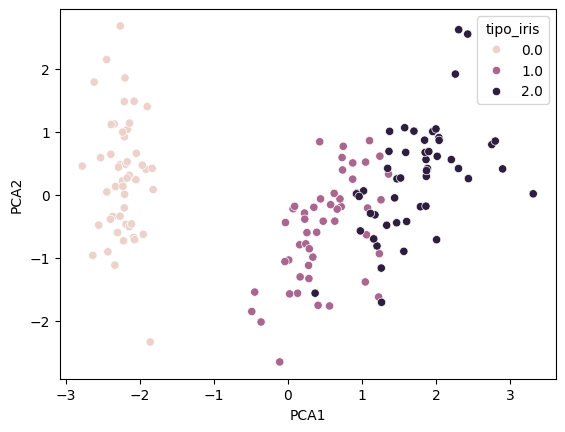

In [46]:
sns.scatterplot(
    x = 'PCA1',
    y = 'PCA2',
    hue = 'tipo_iris',
    data = df_pca
)

### Componentes principales: $n\_components=3$ 

In [48]:
pca_3 = PCA( n_components = 3 )

In [50]:
array_pca_3 = pca_3.fit_transform( df_iris[cols_ss] )
array_pca_3

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ],
       [-2.07563095,  1.48917752, -0.02696829],
       [-2.44402884,  0.0476442 , -0.3354704 ],
       [-2.23284716,  0.22314807,  0.0886955 ],
       [-2.33464048, -1.11532768, -0.14507686],
       [-2.18432817, -0.46901356,  0.25376557],
       [-2.1663101 ,  1.04369065,  0.2686811 ],
       [-2.32613087,  0.13307834, -0.09375924],
       [-2.2184509 , -0.72867617,  0.23091124],
       [-2.6331007 , -0.96150673, -0.18079608],
       [-2.1987406 ,  1.86005711,  0.472901  ],
       [-2.26221453,  2.68628449, -0.03052661],
       [-2.2075877 ,  1.48360936,  0.00534409],
       [-2.19034951,  0.48883832,  0.04421532],
       [-1.898572  ,  1.40501879,  0.37434327],
       [-2.34336905,  1.12784938, -0.13263047],
       [-1.914323  ,  0.40885571,  0.421

In [52]:
df_pca_3 = pd.DataFrame(
    {
        'PCA1' : array_pca_3[:, 0],
        'PCA2' : array_pca_3[:, 1],
        'PCA3' : array_pca_3[:, 2],
        'tipo_iris' : df_iris['tipo_iris']
    }
)
df_pca_3

,PCA1,PCA2,PCA3,tipo_iris
0,-2.264703,0.480027,0.127706,0.000000
1,-2.080961,-0.674134,0.234609,0.000000
2,-2.364229,-0.341908,-0.044201,0.000000
3,-2.299384,-0.597395,-0.091290,0.000000
4,-2.389842,0.646835,-0.015738,0.000000
...,...,...,...,...
145,1.870503,0.386966,-0.256274,2.000000
146,1.564580,-0.896687,0.026371,2.000000
147,1.521170,0.269069,-0.180178,2.000000
148,1.372788,1.011254,-0.933395,2.000000


In [54]:
# Variance explained by component
evr = pca_3.explained_variance_ratio_
print(f"Varianza explicada por componente: \n PCA1: {evr[0]} \n PCA2: {evr[1]}  \n PCA2: {evr[2]}")

Varianza explicada por componente: 
 PCA1: 0.7296244541329986 
 PCA2: 0.22850761786701776  
 PCA2: 0.03668921889282879


In [ ]:
# variance total explained
s_evr = pca_3.explained_variance_ratio_.sum()
print(f"Varianza explicada total: {s_evr}")

Varianza explicada total: 0.9948212908928452


In [56]:
# Variance explained by variable by component
pca_3.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274]])

#### Graficas simples

<Axes: >

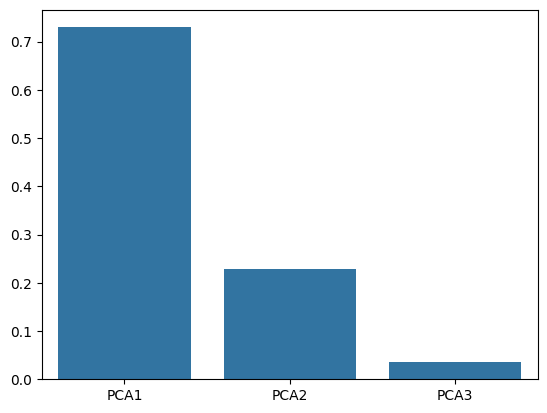

In [57]:
sns.barplot(
    x = ['PCA1', 'PCA2', 'PCA3'],
    y = pca_3.explained_variance_ratio_
)

In [58]:
df_pca_3['tipo_iris'] = df_pca_3['tipo_iris'].astype('int32')

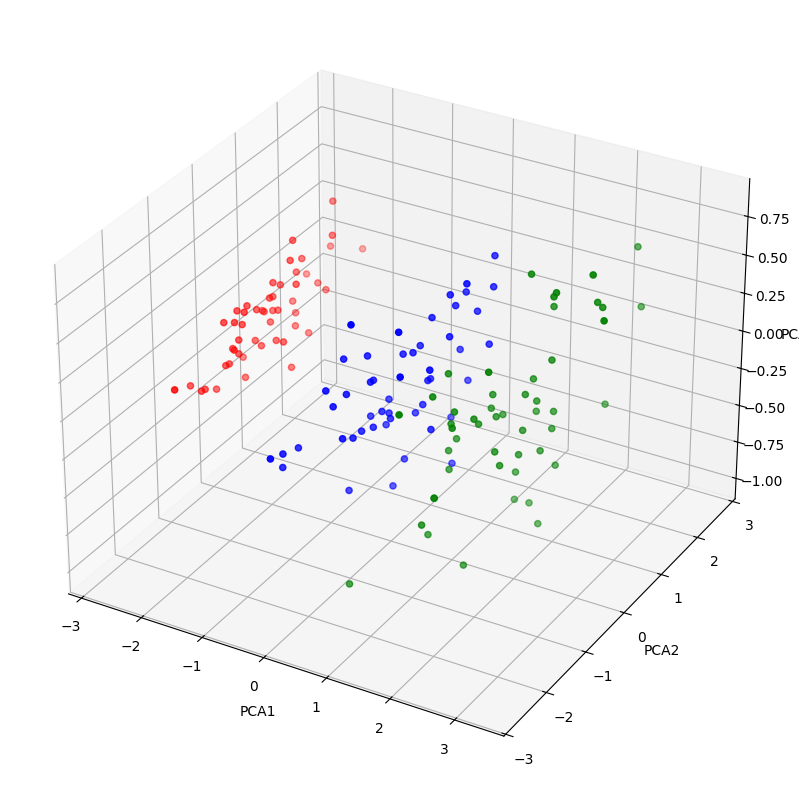

In [59]:
fig = plt.figure( figsize=(10,15) )

ax = fig.add_subplot( 111 , projection='3d')

x = df_pca_3['PCA1']
y = df_pca_3['PCA2']
z = df_pca_3['PCA3']

clase = df_pca_3['tipo_iris'].map( { 0:'r' , 1:'b' , 2:'g' } )

ax.scatter( x,y,z,  c = clase, marker = 'o' )

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()